<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
import csv
import random
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import pickle
from sklearn.preprocessing import StandardScaler
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import seaborn as sns

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [3]:
# os.listdir('input/genres/')

# List directory contents
genres = os.listdir('input/genres/')

# Sort the list in proper numerical order
genres_sorted = sorted(genres, key=lambda x: int(x[1:]))

# Print the sorted list
print(genres_sorted)

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72']


In [4]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [5]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [6]:
# Write the header to the CSV file
file_path = 'NumericalAudioData.csv'
try:
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)
except IOError as e:
    print(f"Error opening or writing to file: {e}")

# List of genres
genres = 'M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25 M26 M27 M28 M29 M30 M31 M32 M33 M34 M35 M36 M37 M38 M39 M40 M41 M42 M43 M44 M45 M46 M47 M48 M49 M50 M51 M52 M53 M54 M55 M56 M57 M58 M59 M60 M61 M62 M63 M64 M65 M66 M67 M68 M69 M70 M71 M72'.split()

# genres = 'M1 M2 M3 M4 M5 M6 M7 M8 M9 M10 M11 M12 M13 M14 M15 M16 M17 M18 M19 M20 M21 M22 M23 M24 M25'.split()

print("genres:", genres)

# Process each genre and each file in the genre
for g in genres:
    genre_path = f'input/genres/{g}'
    if not os.path.isdir(genre_path):
        print(f"Directory not found: {genre_path}")
        continue
    
    for filename in os.listdir(genre_path):
        songname = os.path.join(genre_path, filename)
        print("songname:", songname)
        
        try:
            # Load the audio file
            y, sr = librosa.load(songname, mono=True, duration=30)
            
            # Extract features
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rms(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            
            # Prepare the row to append
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {g}'
            
            # Append the row to the CSV file
            try:
                with open(file_path, 'a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())
            except IOError as e:
                print(f"Error appending to file: {e}")
        
        except Exception as e:
            print(f"Error processing file {songname}: {e}")

print("Processing complete.")


genres: ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72']
songname: input/genres/M1\M1(1).wav
songname: input/genres/M1\M1(2).wav
songname: input/genres/M1\M1(3).wav
songname: input/genres/M1\M1(4).wav
songname: input/genres/M1\M1(5).wav
songname: input/genres/M1\M1(6).wav
songname: input/genres/M1\M1(7).wav
songname: input/genres/M1\M1(8).wav
songname: input/genres/M1\M1(9).wav
songname: input/genres/M2\M2(1).wav
songname: input/genres/M2\M2(10).wav
songname: input/genres/M2\M2(11).wav
songname: input/genres/M2\M2(12).wav
songname: input/genres/M2

songname: input/genres/M21\M21(2).wav
songname: input/genres/M21\M21(3).wav
songname: input/genres/M21\M21(4).wav
songname: input/genres/M21\M21(5).wav
songname: input/genres/M21\M21(6).wav
songname: input/genres/M21\M21(7).wav
songname: input/genres/M21\M21(8).wav
songname: input/genres/M21\M21(9).wav
songname: input/genres/M22\M22(1).wav
songname: input/genres/M22\M22(2).wav
songname: input/genres/M22\M22(3).wav
songname: input/genres/M22\M22(4).wav
songname: input/genres/M22\M22(5).wav
songname: input/genres/M22\M22(6).wav
songname: input/genres/M22\M22(7).wav
songname: input/genres/M22\M22(8).wav
songname: input/genres/M22\M22(9).wav
songname: input/genres/M23\M23(1).wav
songname: input/genres/M23\M23(10).wav
songname: input/genres/M23\M23(11).wav
songname: input/genres/M23\M23(2).wav
songname: input/genres/M23\M23(3).wav
songname: input/genres/M23\M23(4).wav
songname: input/genres/M23\M23(5).wav
songname: input/genres/M23\M23(6).wav
songname: input/genres/M23\M23(7).wav
songname: 

songname: input/genres/M42\M42(5).wav
songname: input/genres/M42\M42(6).wav
songname: input/genres/M42\M42(7).wav
songname: input/genres/M42\M42(8).wav
songname: input/genres/M42\M42(9).wav
songname: input/genres/M43\M43(1).wav
songname: input/genres/M43\M43(10).wav
songname: input/genres/M43\M43(11).wav
songname: input/genres/M43\M43(2).wav
songname: input/genres/M43\M43(3).wav
songname: input/genres/M43\M43(4).wav
songname: input/genres/M43\M43(5).wav
songname: input/genres/M43\M43(6).wav
songname: input/genres/M43\M43(7).wav
songname: input/genres/M43\M43(8).wav
songname: input/genres/M43\M43(9).wav
songname: input/genres/M44\M44(1).wav
songname: input/genres/M44\M44(10).wav
songname: input/genres/M44\M44(2).wav
songname: input/genres/M44\M44(3).wav
songname: input/genres/M44\M44(4).wav
songname: input/genres/M44\M44(5).wav
songname: input/genres/M44\M44(6).wav
songname: input/genres/M44\M44(7).wav
songname: input/genres/M44\M44(8).wav
songname: input/genres/M44\M44(9).wav
songname:

songname: input/genres/M63\M63(4).wav
songname: input/genres/M63\M63(6).wav
songname: input/genres/M63\M63(7).wav
songname: input/genres/M63\M63(8).wav
songname: input/genres/M63\M63(9).wav
songname: input/genres/M63\M63_5_.wav
songname: input/genres/M64\M64(1).wav
songname: input/genres/M64\M64(10).wav
songname: input/genres/M64\M64(2).wav
songname: input/genres/M64\M64(3).wav
songname: input/genres/M64\M64(4).wav
songname: input/genres/M64\M64(5).wav
songname: input/genres/M64\M64(6).wav
songname: input/genres/M64\M64(7).wav
songname: input/genres/M64\M64(8).wav
songname: input/genres/M64\M64(9).wav
songname: input/genres/M65\M65(1).wav
songname: input/genres/M65\M65(10).wav
songname: input/genres/M65\M65(2).wav
songname: input/genres/M65\M65(3).wav
songname: input/genres/M65\M65(4).wav
songname: input/genres/M65\M65(5).wav
songname: input/genres/M65\M65(6).wav
songname: input/genres/M65\M65(7).wav
songname: input/genres/M65\M65(8).wav
songname: input/genres/M65\M65(9).wav
songname: 

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [7]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0  M1(1).wav     0.238488  0.083276        1242.340169         1383.417808   
1  M1(2).wav     0.241128  0.112799        1695.500069         1899.096753   
2  M1(3).wav     0.318982  0.020743        1827.633520         1833.163709   
3  M1(4).wav     0.212414  0.073962        2169.672346         2161.321946   
4  M1(5).wav     0.230082  0.050568        1684.333572         1829.643941   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0  2174.136853            0.068729 -284.045807  141.135239 -21.163836  ...   
1  3040.189950            0.084507 -192.153152  101.925018 -31.456619  ...   
2  3612.461489            0.084439 -353.160736  107.619652 -37.818237  ...   
3  4247.640982            0.085397 -217.985245   69.280075 -39.979507  ...   
4  2631.434088            0.094652 -338.386169  108.554459 -33.694111  ...   

      mfcc12     mfcc13     mfcc14     mfcc15    mfcc16     mfcc17    mfcc18  \
0 -29.556786   7.144430  -0.657712   1.763511  3.174584  -6.601313 -7.915104   
1 -10.167237   1.487521  12.301415 -11.513089  0.691031   5.024289  6.390421   
2  -5.141618  -5.092138 -11.754651  -5.685144  8.488720  -9.555749  2.957926   
3   1.975145  -8.747527  11.015077  -8.880787 -4.073452  -6.100463  3.738625   
4 -15.468699 -16.042923   7.158023 -23.038960  0.883553 -13.163644  2.312249   

      mfcc19     mfcc20  label  
0  -9.406194  -6.453637     M1  
1  -4.318320  11.602271     M1  
2  -2.407405  -3.943414     M1  
3 -11.407726  -2.676183     M1  
4 -10.513357  -6.732892     M1  

[5 rows x 28 columns]

In [8]:
print(data.shape)

(739, 28)


In [9]:
data["label"].value_counts()

M38    13
M68    13
M70    13
M2     13
M49    12
       ..
M17     9
M13     9
M8      9
M26     8
M37     8
Name: label, Length: 72, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

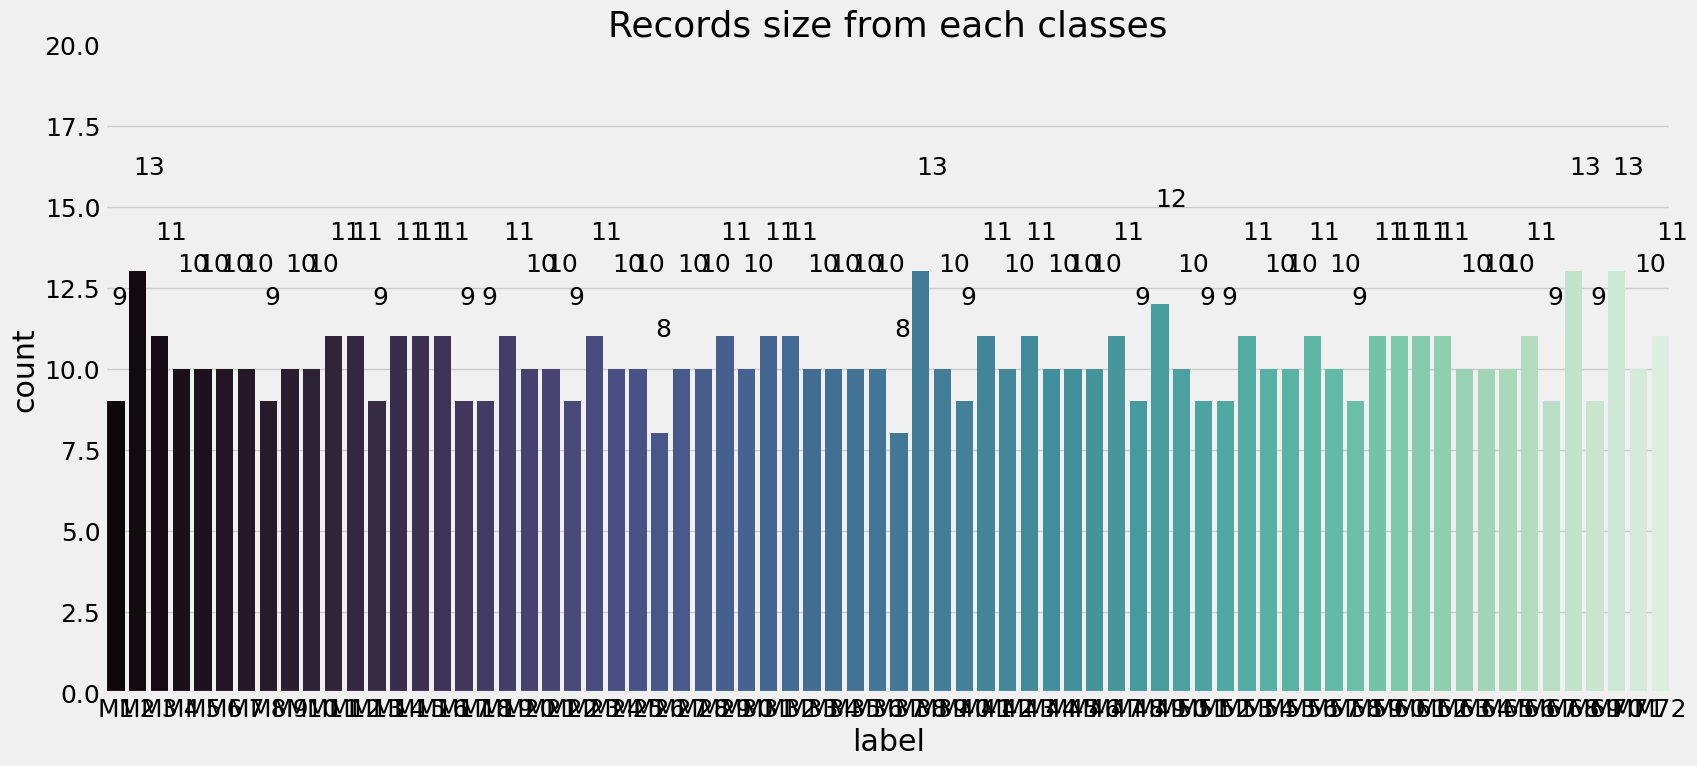

In [10]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=data, palette="mako")
    plt.title(label="Records size from each classes")
    plt.ylim(0,20)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

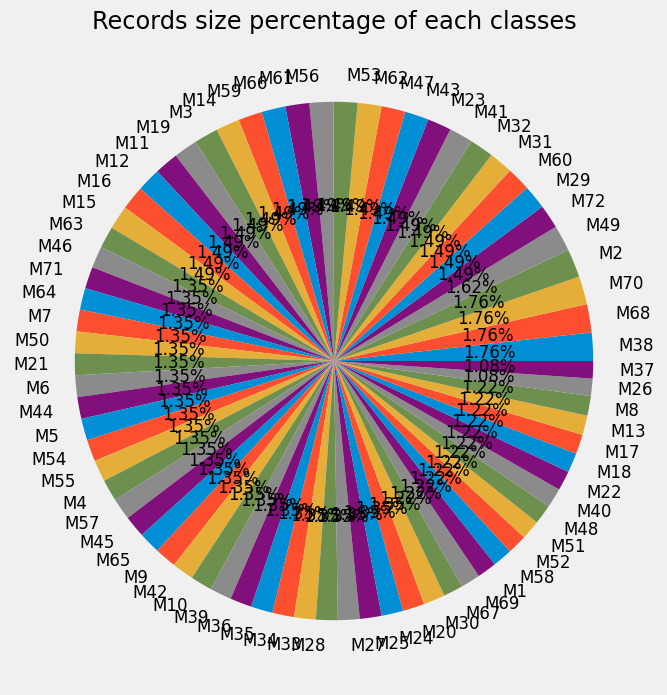

In [11]:
chart_data = dict(data['label'].value_counts())

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%")
    plt.title(label="Records size percentage of each classes")
    plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(739, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         739 non-null    float64
 1   rmse                739 non-null    float64
 2   spectral_centroid   739 non-null    float64
 3   spectral_bandwidth  739 non-null    float64
 4   rolloff             739 non-null    float64
 5   zero_crossing_rate  739 non-null    float64
 6   mfcc1               739 non-null    float64
 7   mfcc2               739 non-null    float64
 8   mfcc3               739 non-null    float64
 9   mfcc4               739 non-null    float64
 10  mfcc5               739 non-null    float64
 11  mfcc6               739 non-null    float64
 12  mfcc7               739 non-null    float64
 13  mfcc8               739 non-null    float64
 14  mfcc9               739 non-null    float64
 15  mfcc10              739 non-null    float64
 16  mfcc11  

In [15]:
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.238488  0.083276        1242.340169         1383.417808  2174.136853   
1     0.241128  0.112799        1695.500069         1899.096753  3040.189950   
2     0.318982  0.020743        1827.633520         1833.163709  3612.461489   
3     0.212414  0.073962        2169.672346         2161.321946  4247.640982   
4     0.230082  0.050568        1684.333572         1829.643941  2631.434088   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.068729 -284.045807  141.135239 -21.163836  -1.707885  ...   
1            0.084507 -192.153152  101.925018 -31.456619  -7.964826  ...   
2            0.084439 -353.160736  107.619652 -37.818237  36.086227  ...   
3            0.085397 -217.985245   69.280075 -39.979507  26.406437  ...   
4            0.094652 -338.386169  108.554459 -33.694111 -15.979538  ...   

      mfcc12     mfcc13     mfcc14     mfcc15    mfcc16     mfcc17    mfcc18  \
0 -29.556786   7.144430  -0.657712   1.763511  3.174584  -6.601313 -7.915104   
1 -10.167237   1.487521  12.301415 -11.513089  0.691031   5.024289  6.390421   
2  -5.141618  -5.092138 -11.754651  -5.685144  8.488720  -9.555749  2.957926   
3   1.975145  -8.747527  11.015077  -8.880787 -4.073452  -6.100463  3.738625   
4 -15.468699 -16.042923   7.158023 -23.038960  0.883553 -13.163644  2.312249   

      mfcc19     mfcc20  label  
0  -9.406194  -6.453637     M1  
1  -4.318320  11.602271     M1  
2  -2.407405  -3.943414     M1  
3 -11.407726  -2.676183     M1  
4 -10.513357  -6.732892     M1  

[5 rows x 27 columns]

In [16]:
class_labels = data["label"].unique().tolist()
class_labels.sort()

print(class_labels)

['M1', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M2', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M3', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M4', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M5', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M6', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M7', 'M70', 'M71', 'M72', 'M8', 'M9']


In [17]:
oversampled = []

for label in class_labels:
    label_df = data.loc[data["label"] == label]
    oversampled_df = resample(label_df, n_samples=100)
    oversampled.append(oversampled_df)
    
df = pd.concat(objs=oversampled, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.234508  0.071564        1939.655923         1324.818298  3289.055112   
1     0.244737  0.132795        1796.861972         1998.125353  3586.644979   
2     0.308321  0.225742        2691.317008         2718.071892  6034.271845   
3     0.238031  0.123080        1795.130109         1904.337530  3304.530018   
4     0.264397  0.327745        2100.777988         2304.127329  4546.130844   

   zero_crossing_rate       mfcc1      mfcc2      mfcc3      mfcc4  ...  \
0            0.154823 -276.328461  59.005428 -82.074898  29.954561  ...   
1            0.081167 -179.309509  94.727104 -20.871834   8.164412  ...   
2            0.117235  -64.079979  64.927689   6.909040  45.058731  ...   
3            0.091165 -204.560135  91.879929 -45.179592  -0.225076  ...   
4            0.086804  -54.779816  83.359131 -13.281894  32.286510  ...   

      mfcc12     mfcc13     mfcc14     mfcc15     mfcc16     mfcc17  \
0  -4.131139  -7.545840  -5.869067  -3.250659   1.141398   2.610323   
1 -10.177499 -12.693142  -6.444017  -9.502775  -4.749285  -6.994035   
2  12.833174  -3.155729   0.942616  -9.240076  -1.521025 -13.248672   
3 -20.488430 -27.092894 -15.300757 -15.435922 -17.450531 -15.998806   
4  -4.915202 -14.950223  -1.466435 -13.798949  -2.384901 -11.597498   

      mfcc18     mfcc19     mfcc20  label  
0   3.164374  -0.997522  -4.074195    M19  
1  -0.418809  -1.689964  -2.541800    M47  
2   6.296169  -4.317630   3.289378    M14  
3 -17.983120 -15.383784 -14.959470    M44  
4  -2.025458 -11.702099   2.457934    M15  

[5 rows x 27 columns]

In [18]:
df.shape

(7200, 27)

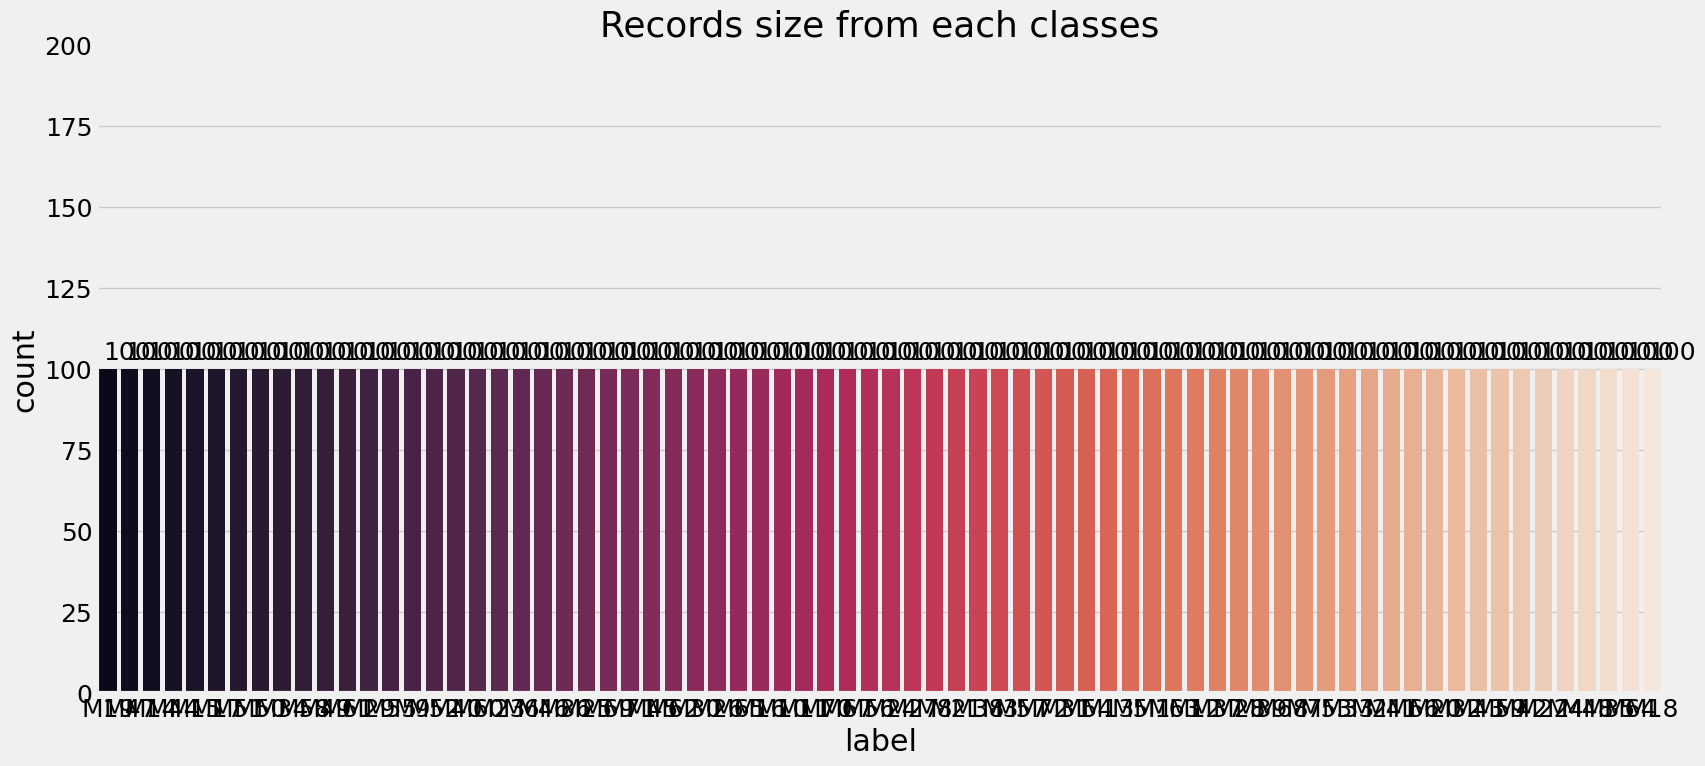

In [19]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=18
    ax=sns.countplot(x="label",data=df, palette="rocket")
    plt.title(label="Records size from each classes")
    plt.ylim(0,200)
    for p in ax.patches:
        ax.annotate((p.get_height()),(p.get_x()+0.20,p.get_height()+3))
    plt.show()

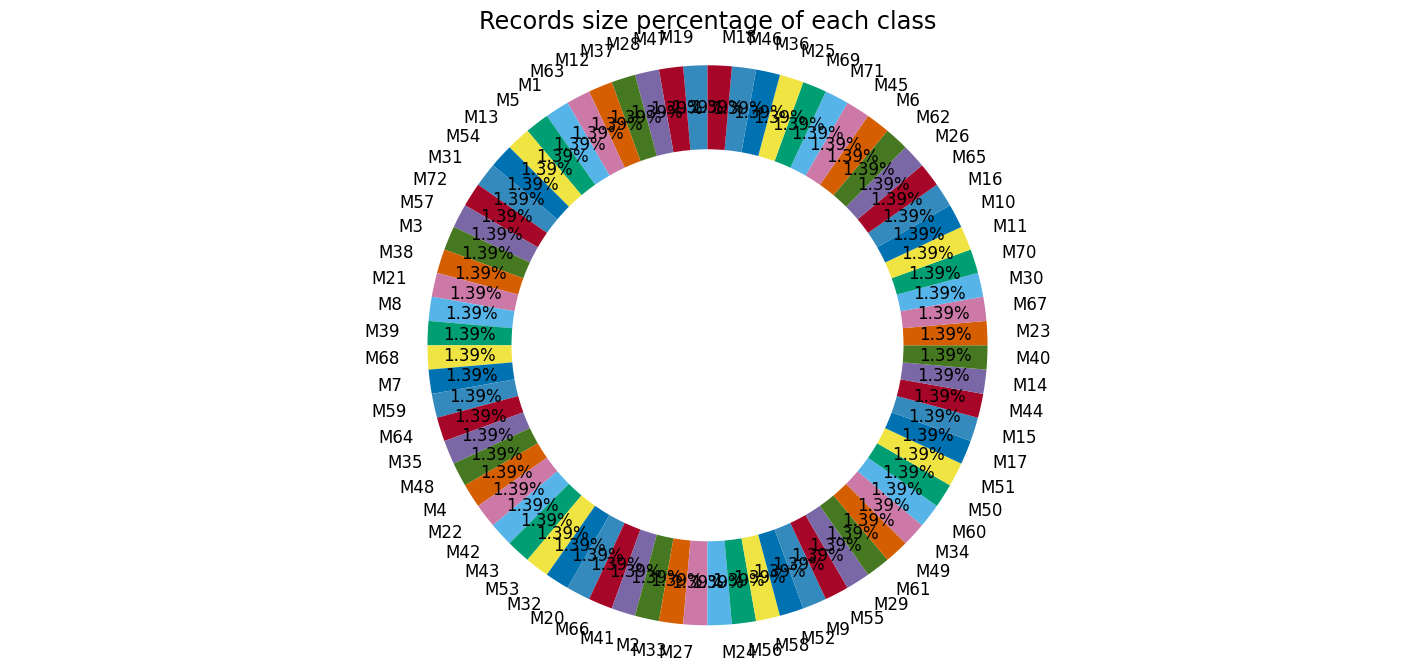

In [20]:
chart_data = dict(df['label'].value_counts())

with plt.style.context(style="bmh"):
    plt.figure(figsize=(18, 8))
    plt.rcParams["font.size"] = 12
    plt.pie(x=chart_data.values(), labels=chart_data.keys(), autopct="%.2f%%", startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.title(label="Records size percentage of each class")
    plt.show()

In [21]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.234508  0.071564        1939.655923         1324.818298  3289.055112   
1     0.244737  0.132795        1796.861972         1998.125353  3586.644979   
2     0.308321  0.225742        2691.317008         2718.071892  6034.271845   
3     0.238031  0.123080        1795.130109         1904.337530  3304.530018   
4     0.264397  0.327745        2100.777988         2304.127329  4546.130844   

   zero_crossing_rate       mfcc1      mfcc2      mfcc3      mfcc4  ...  \
0            0.154823 -276.328461  59.005428 -82.074898  29.954561  ...   
1            0.081167 -179.309509  94.727104 -20.871834   8.164412  ...   
2            0.117235  -64.079979  64.927689   6.909040  45.058731  ...   
3            0.091165 -204.560135  91.879929 -45.179592  -0.225076  ...   
4            0.086804  -54.779816  83.359131 -13.281894  32.286510  ...   

      mfcc11     mfcc12     mfcc13     mfcc14     mfcc15     mfcc16  \
0 -18.969858  -4.131139  -7.545840  -5.869067  -3.250659   1.141398   
1 -16.036463 -10.177499 -12.693142  -6.444017  -9.502775  -4.749285   
2  -1.473486  12.833174  -3.155729   0.942616  -9.240076  -1.521025   
3  -9.975898 -20.488430 -27.092894 -15.300757 -15.435922 -17.450531   
4  -8.000202  -4.915202 -14.950223  -1.466435 -13.798949  -2.384901   

      mfcc17     mfcc18     mfcc19     mfcc20  
0   2.610323   3.164374  -0.997522  -4.074195  
1  -6.994035  -0.418809  -1.689964  -2.541800  
2 -13.248672   6.296169  -4.317630   3.289378  
3 -15.998806 -17.983120 -15.383784 -14.959470  
4 -11.597498  -2.025458 -11.702099   2.457934  

[5 rows x 26 columns]

In [22]:
y = df[["label"]]
y.head(10)

label
0   M19
1   M47
2   M14
3   M44
4   M15
5   M17
6   M51
7   M50
8   M34
9   M58

In [23]:
scaler = StandardScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(scaled_X, columns=X.columns)
df['label'] = y.values.ravel()

df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0    -0.270260 -0.348061           0.608565           -0.829869  0.174813   
1    -0.087150  0.528173           0.322239            0.738831  0.459353   
2     1.050982  1.858273           2.115776            2.416193  2.799646   
3    -0.207193  0.389147           0.318766            0.520320  0.189609   
4     0.264757  3.317961           0.931643            1.451767  1.376763   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0            2.200209 -0.137163 -1.504291 -2.319668  0.695596  ... -0.249074   
1           -0.038320  0.772323 -0.416945  0.316858 -0.607014  ... -1.127402   
2            1.057835  1.852519 -1.324021  1.513612  1.598519  ...  2.215259   
3            0.265536  0.535616 -0.503611 -0.730279 -1.108535  ... -2.625226   
4            0.133013  1.939702 -0.762979  0.643820  0.834999  ... -0.362971   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  0.072461 -0.784260  0.451308  0.328692  1.185210  0.648379  0.715634   
1 -0.684424 -0.874969 -0.663704 -0.638770 -0.334395 -0.008147  0.587574   
2  0.718005  0.290406 -0.616854 -0.108574 -1.324005  1.222200  0.101616   
3 -2.801835 -2.272279 -1.721831 -2.724771 -1.759133 -3.226355 -1.944950   
4 -1.016316 -0.089665 -1.429891 -0.250453 -1.062756 -0.302524 -1.264062   

     mfcc20  label  
0 -0.928880    M19  
1 -0.626289    M47  
2  0.525152    M14  
3 -3.078317    M44  
4  0.360973    M15  

[5 rows x 27 columns]

In [24]:
with open(file="models/Scaler.pkl", mode="wb") as file:
    pickle.dump(obj=scaler, file=file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         7200 non-null   float64
 1   rmse                7200 non-null   float64
 2   spectral_centroid   7200 non-null   float64
 3   spectral_bandwidth  7200 non-null   float64
 4   rolloff             7200 non-null   float64
 5   zero_crossing_rate  7200 non-null   float64
 6   mfcc1               7200 non-null   float64
 7   mfcc2               7200 non-null   float64
 8   mfcc3               7200 non-null   float64
 9   mfcc4               7200 non-null   float64
 10  mfcc5               7200 non-null   float64
 11  mfcc6               7200 non-null   float64
 12  mfcc7               7200 non-null   float64
 13  mfcc8               7200 non-null   float64
 14  mfcc9               7200 non-null   float64
 15  mfcc10              7200 non-null   float64
 16  mfcc11

In [26]:
class_dict = {}

for idx, label in enumerate(class_labels):
    class_dict[label] = idx
    
print(class_dict)

{'M1': 0, 'M10': 1, 'M11': 2, 'M12': 3, 'M13': 4, 'M14': 5, 'M15': 6, 'M16': 7, 'M17': 8, 'M18': 9, 'M19': 10, 'M2': 11, 'M20': 12, 'M21': 13, 'M22': 14, 'M23': 15, 'M24': 16, 'M25': 17, 'M26': 18, 'M27': 19, 'M28': 20, 'M29': 21, 'M3': 22, 'M30': 23, 'M31': 24, 'M32': 25, 'M33': 26, 'M34': 27, 'M35': 28, 'M36': 29, 'M37': 30, 'M38': 31, 'M39': 32, 'M4': 33, 'M40': 34, 'M41': 35, 'M42': 36, 'M43': 37, 'M44': 38, 'M45': 39, 'M46': 40, 'M47': 41, 'M48': 42, 'M49': 43, 'M5': 44, 'M50': 45, 'M51': 46, 'M52': 47, 'M53': 48, 'M54': 49, 'M55': 50, 'M56': 51, 'M57': 52, 'M58': 53, 'M59': 54, 'M6': 55, 'M60': 56, 'M61': 57, 'M62': 58, 'M63': 59, 'M64': 60, 'M65': 61, 'M66': 62, 'M67': 63, 'M68': 64, 'M69': 65, 'M7': 66, 'M70': 67, 'M71': 68, 'M72': 69, 'M8': 70, 'M9': 71}


In [27]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'chroma_stft': [-2.70259734e-01 -8.71501342e-02  1.05098213e+00 -2.07192615e-01
  2.64756810e-01 -1.13647505e-01  4.63215431e-01 -7.55398765e-01
 -4.64447976e-02  6.31405440e-01 -1.82680736e+00  2.57903550e-01
  2.25168700e+00  1.13088313e+00 -5.05110370e-02  1.85587401e+00
 -2.03312551e-01 -1.27466407e+00  1.62020123e+00 -1.15848511e+00
  2.66073370e-01  1.64643641e+00 -8.66571270e-01 -1.88077485e+00
 -1.73649044e+00 -1.24563867e+00 -2.04366919e-01 -8.41552404e-03
  7.41081077e-01 -2.74104591e-01  5.22024801e-01  6.68612663e-01
 -4.92422036e-01 -1.03333670e+00  1.10929468e-01  1.49565810e-01
  3.37392728e-01 -5.07703041e-01  4.02248779e-01 -1.50997427e-01
 -4.54423703e-01  3.94899942e-01 -6.15925021e-01  1.61770521e+00
 -9.57288283e-01  4.47172389e-01 -8.63320146e-01  2.24463566e-01
  7.23715434e-02  4.38398167e-01  8.89805949e-01  9.05499939e-02
  1.48727721e+00  1.24318389e+00 -9.79322700e-02  1.12710362e+00
  1.45658273e-01  6.41825188e-02 -7.18456574e-02 -5.767253

In [28]:
df['label'] = df['label'].map(class_dict)
df.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0    -0.270260 -0.348061           0.608565           -0.829869  0.174813   
1    -0.087150  0.528173           0.322239            0.738831  0.459353   
2     1.050982  1.858273           2.115776            2.416193  2.799646   
3    -0.207193  0.389147           0.318766            0.520320  0.189609   
4     0.264757  3.317961           0.931643            1.451767  1.376763   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc12  \
0            2.200209 -0.137163 -1.504291 -2.319668  0.695596  ... -0.249074   
1           -0.038320  0.772323 -0.416945  0.316858 -0.607014  ... -1.127402   
2            1.057835  1.852519 -1.324021  1.513612  1.598519  ...  2.215259   
3            0.265536  0.535616 -0.503611 -0.730279 -1.108535  ... -2.625226   
4            0.133013  1.939702 -0.762979  0.643820  0.834999  ... -0.362971   

     mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18    mfcc19  \
0  0.072461 -0.784260  0.451308  0.328692  1.185210  0.648379  0.715634   
1 -0.684424 -0.874969 -0.663704 -0.638770 -0.334395 -0.008147  0.587574   
2  0.718005  0.290406 -0.616854 -0.108574 -1.324005  1.222200  0.101616   
3 -2.801835 -2.272279 -1.721831 -2.724771 -1.759133 -3.226355 -1.944950   
4 -1.016316 -0.089665 -1.429891 -0.250453 -1.062756 -0.302524 -1.264062   

     mfcc20  label  
0 -0.928880     10  
1 -0.626289     41  
2  0.525152      5  
3 -3.078317     38  
4  0.360973      6  

[5 rows x 27 columns]

In [29]:
X = df.drop(labels="label", axis=1)
X.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
0    -0.270260 -0.348061           0.608565           -0.829869  0.174813   
1    -0.087150  0.528173           0.322239            0.738831  0.459353   
2     1.050982  1.858273           2.115776            2.416193  2.799646   
3    -0.207193  0.389147           0.318766            0.520320  0.189609   
4     0.264757  3.317961           0.931643            1.451767  1.376763   

   zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...    mfcc11  \
0            2.200209 -0.137163 -1.504291 -2.319668  0.695596  ... -1.340902   
1           -0.038320  0.772323 -0.416945  0.316858 -0.607014  ... -0.922573   
2            1.057835  1.852519 -1.324021  1.513612  1.598519  ...  1.154241   
3            0.265536  0.535616 -0.503611 -0.730279 -1.108535  ... -0.058281   
4            0.133013  1.939702 -0.762979  0.643820  0.834999  ...  0.223472   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -0.249074  0.072461 -0.784260  0.451308  0.328692  1.185210  0.648379   
1 -1.127402 -0.684424 -0.874969 -0.663704 -0.638770 -0.334395 -0.008147   
2  2.215259  0.718005  0.290406 -0.616854 -0.108574 -1.324005  1.222200   
3 -2.625226 -2.801835 -2.272279 -1.721831 -2.724771 -1.759133 -3.226355   
4 -0.362971 -1.016316 -0.089665 -1.429891 -0.250453 -1.062756 -0.302524   

     mfcc19    mfcc20  
0  0.715634 -0.928880  
1  0.587574 -0.626289  
2  0.101616  0.525152  
3 -1.944950 -3.078317  
4 -1.264062  0.360973  

[5 rows x 26 columns]

In [30]:
y = df[["label"]]
y.head()

label
0     10
1     41
2      5
3     38
4      6

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5760, 26) (1440, 26) (5760, 1) (1440, 1)


In [32]:
X_train.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
2535     1.221106  0.489759          -0.924096           -0.363907 -0.930009   
667     -0.199008 -0.180450          -0.789674           -0.693342 -0.891214   
4886    -0.765692 -0.162219          -0.642334           -0.654802 -0.521625   
5743     1.885895 -0.708012           3.329272            1.432904  2.389501   
220     -0.963151 -1.162165          -1.327404           -1.073976 -0.988374   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
2535           -0.806040  0.959887  1.470180  0.646332  0.271406  ...   
667            -0.416316 -0.209507  0.995692  0.304280 -1.197177  ...   
4886           -0.660194  0.260582  0.901346 -0.681222  0.130671  ...   
5743            5.147202  0.702458 -1.815012 -0.117043  1.843494  ...   
220            -1.487455 -1.888065  1.572646 -0.031178  2.548571  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
2535 -0.288815 -0.978882  1.133899 -0.062575 -1.097358  0.064739 -0.217500   
667   1.150316 -3.942547  2.232592  0.037926  1.345543  0.662614 -0.272258   
4886  0.461562  0.079567  0.341312 -0.541997  1.231326  0.222736  0.789224   
5743 -1.711726  4.061444 -0.912357  3.647447 -1.078892  2.077074 -1.106065   
220  -0.426204  0.621573 -1.826044 -0.978930 -1.418808 -2.362313  0.757747   

        mfcc18    mfcc19    mfcc20  
2535 -1.171090  0.479437  0.203392  
667  -1.381650 -0.839459 -1.398731  
4886 -0.799442  0.309965  0.916710  
5743  2.694307  0.831225  0.624236  
220  -1.687839  0.951507 -0.471442  

[5 rows x 26 columns]

In [33]:
y_train.head()

label
2535      0
667       0
4886     29
5743      6
220      52

In [34]:
X_test.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth   rolloff  \
2123     1.143992 -0.834295          -1.009085            0.119723 -0.991051   
4396    -0.288032 -0.752863          -1.230409           -1.118162 -1.024468   
7120    -0.555892  0.357656          -0.856210           -1.104357 -1.080052   
6322     0.270173 -1.245677          -2.478459           -2.530704 -2.344040   
4931     0.460676 -0.331581           0.379935            0.446198  0.245759   

      zero_crossing_rate     mfcc1     mfcc2     mfcc3     mfcc4  ...  \
2123           -1.110918 -0.959042  0.967352  2.143267 -0.393980  ...   
4396           -1.187091 -0.919485  1.421181  0.420972 -0.064234  ...   
7120           -0.524524  0.241398  1.311977 -1.182157 -0.540949  ...   
6322           -1.863752 -2.773172  0.904292  3.408582 -0.162131  ...   
4931            0.405352  0.031567 -0.141099  0.688923 -1.617682  ...   

        mfcc11    mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17  \
2123  1.909041  1.080552  1.331349  0.055925  0.496995  0.149232  0.652866   
4396  1.001170 -0.528230  0.744344 -0.438578 -0.242111 -1.030312  0.127440   
7120 -0.536692 -2.436175 -0.263173 -0.791016 -1.915047 -2.207200 -0.184792   
6322  1.219317  0.310560  0.880265  0.045700  1.637837  0.709559  0.484689   
4931  0.390163 -0.834915 -0.536783 -1.059625  1.009022 -0.037524 -0.507617   

        mfcc18    mfcc19    mfcc20  
2123  0.530859  0.833218  0.121678  
4396 -1.123560 -0.692826 -0.822088  
7120 -1.003268  0.361323  0.064834  
6322 -1.365598 -0.862048 -1.314840  
4931 -0.637565 -0.464992  0.783960  

[5 rows x 26 columns]

In [35]:
y_test.head()

label
2123     34
4396     48
7120      9
6322     28
4931     62

In [36]:
X_train.to_csv("splitted_data/X_train.csv", index=False)
X_test.to_csv("splitted_data/X_test.csv", index=False)
y_train.to_csv("splitted_data/y_train.csv", index=False)
y_test.to_csv("splitted_data/y_test.csv", index=False)

---